$$
H_0: \mu_1 = \mu_2\\
H_a: \mu_1 \neq \mu_2
$$

$$
z_{cal} = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}
$$

No difference in finding the critical value, apart from $z_{cal}$ it is very much the same as the one sample z test

Example, take 100 samples each for two machines. We find for machine_1: mean=151.2/sd=2.1 and machine_2: mean=151.9/sd=2.2
Is there a significant difference between these two machines? (check at 95% confidence level)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import scipy.stats as stats
from statsmodels.stats import weightstats

In [2]:
df = pd.read_csv("Two_Machines.csv")
df.head()

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1


In [6]:
mac_1 = df[df["Machine"] == "Machine 1"]["Volume"]
mac_2 = df[df["Machine"] == "Machine 2"]["Volume"]
print(mac_1.mean())
print(mac_1.std())
print(mac_2.mean())
print(mac_2.std())

151.20390000000003
2.1136511064979473
151.8728
2.2060193502635848


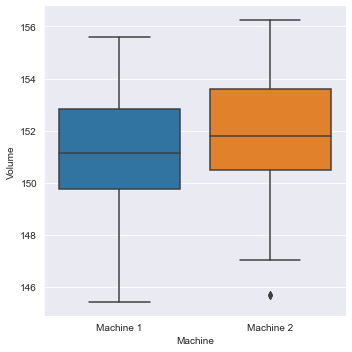

In [20]:
sns.catplot(data=df, x="Machine", y="Volume", kind="box")

In [23]:
# now the test

weightstats.ztest(x1=mac_1, x2=mac_2) # -> (z_cal, p)

# since p < 0.05 we reject the null hypothesis and conclude that from this test the two machines are producing different volumes

(-2.189406040190184, 0.028567341032618248)

In [24]:
# can do two sample t test as well

weightstats.ttest_ind(x1=mac_1, x2=mac_2)

(-2.189406040190184, 0.029736299645472124, 198.0)

In [26]:
# or

stats.ttest_ind(mac_1, mac_2) 

Ttest_indResult(statistic=-2.189406040190184, pvalue=0.029736299645472124)

In [28]:
# tips dataset

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [32]:
tips = sns.load_dataset("tips")
tips["percentage"] = tips["tip"]/tips["total_bill"]*100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [33]:
tips.describe()

,total_bill,tip,size,percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


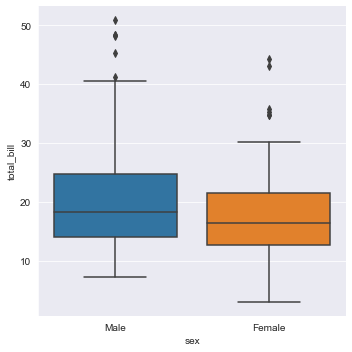

In [39]:
sns.catplot(data=tips, x="sex", y="total_bill", kind="box")

In [35]:
# is there a significant difference in the percentage tip given by gender?

m = tips[tips["sex"] == "Male"]["percentage"]
f = tips[tips["sex"] == "Female"]["percentage"]

In [37]:
weightstats.ztest(m, f)
# p value > 0.05, hence no significant difference

(-1.0833972270478005, 0.27863214596395247)

In [38]:
# is there a significant difference in the total tip given by gender?

m = tips[tips["sex"] == "Male"]["tip"]
f = tips[tips["sex"] == "Female"]["tip"]

weightstats.ztest(m, f)
# p value > 0.05, hence no significant difference

(1.3878597054212687, 0.1651797698624794)

In [42]:
# is there a significant difference in the total bill given by gender?

m = tips[tips["sex"] == "Male"]["total_bill"]
f = tips[tips["sex"] == "Female"]["total_bill"]

print(weightstats.ztest(m, f))
# here there is a significant difference (p < 0.05)

print(weightstats.ztest(m, f, alternative="larger"))
# in fact the male bill is statistically larger than the female bills

(2.2777940289803134, 0.02273885225548586)
(2.2777940289803134, 0.01136942612774293)
(2.2777940289803134, 0.9886305738722571)
